# Incident variance 2020-08-03

## Setup

In [1]:
library(oildata)
library(tidyverse)
library(stringr)
library(tidytext)
library(topicmodels)
library(ldatuning)
library(SnowballC)
library(DT)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(incidents)

DATAFILE_AS_OF,significant,serious,incident_ID,ID,name,state,on_offshore,system,item,⋯,date,long,lat,water_contamination,manufacture_year,surface_water_remediation,groundwater_remediation,soil_remediation,vegetation_remediation,wildlife_remediation
<dttm>,<lgl>,<lgl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<date>,<chr>,<chr>,<lgl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
2020-03-31 04:52:07,TRUE,FALSE,19860003,22907,Wyco Pipe Line,CO,onshore,Line Pipe,Pipe,⋯,1986-01-05,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-03-31 04:52:07,TRUE,FALSE,19860005,18194,Seminole Pipeline,TX,onshore,Pumping Station,No Data,⋯,1986-01-12,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-03-31 04:52:07,TRUE,FALSE,19860027,12628,Mobil Pipeline,TX,onshore,Tank Farm,Tank,⋯,1986-01-29,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-03-31 04:52:07,TRUE,FALSE,19860028,12628,Mobil Pipeline,TX,onshore,Line Pipe,Pipe,⋯,1986-01-14,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-03-31 04:52:07,TRUE,FALSE,19860029,18273,Shell Pipe Line,TX,onshore,Line Pipe,Pipe,⋯,1986-02-06,NA,NA,NA,NA,NA,NA,NA,NA,NA
2020-03-31 04:52:07,TRUE,FALSE,19860030,18273,Shell Pipe Line,TX,onshore,Line Pipe,Pipe,⋯,1986-01-29,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
names <- unique(word(incidents$name, 1))
names

[1] "Wyco"             "Seminole"         "Mobil"           
  [4] "Shell"            "Sun"              "Phillips"        
  [7] "Jayhawk"          "Wood"             "Four"            
 [10] "Conoco"           "Amoco"            "Ashland"         
 [13] "Mid"              "Arco"             "Marathon"        
 [16] "Buckeye"          "Chevron"          "Southern"        
 [19] "Unocal"           "Farmers"          "Coastal"         
 [22] "Hydrocarbon"      "Portal"           "Texaco"          
 [25] "Continental"      "Total"            "Tesoro"          
 [28] "Shamrock"         "Texas"            "Kiantone"        
 [31] "Cenex"            "Williams"         "Lakehead"        
 [34] "West"             "Olympic"          "Exxon"           
 [37] "Miami"            "Wesco"            "Fina"            
 [40] "Rancho"           "Colonial"         "Harbor"          
 [43] "Cayuse"           "Calnev"           "Yellowstone"     
 [46] "Sunniland"        "Enron"            "Portland"        
 [49] "Comyn"            "Sohio"            "Explorer"        
 [52] "Allegheny"        "Seadrift"         "Koch"            
 [55] "San"              "Beacon"           "American"        
 [58] "D"                "Gulf"             "Scurlock"        
 [61] "Kaneb"            "Badger"           "Florida"         
 [64] "Amber"            "Black"            "Plantation"      
 [67] "Atlantic"         "Dome"             "Chase"           
 [70] "Steuart"          "Emerald"          "Con"             
 [73] "Golden"           "Belle"            "Union"           
 [76] "Ciniza"           "Douglas"          "Houston"         
 [79] "Citgo"            "Dixie"            "Pride"           
 [82] "Enterprise"       "Cabot"            "Oxy"             
 [85] "Csx"              "Witco"            "All"             
 [88] "Navajo"           "Pacific"          "Lake"            
 [91] "Quanah"           "Meridian"         "Paramount"       
 [94] "Platte"           "Bp"               "Placid"          
 [97] "Associated"       "Loop"             "Sigmor"          
[100] "Carswell"         "Santa"            "Hoechst"         
[103] "Arbuckle"         "Endicott"         "Pennzoil"        
[106] "Diamond"          "Powerine"         "Alyeska"         
[109] "Tampa"            "Sinclair"         "Trans"           
[112] "Western"          "Central"          "Tenneco"         
[115] "Giant"            "Kerr"             "Coastline"       
[118] "Bayside"          "T"                "Hunt"            
[121] "Piney"            "Hawiian"          "National"        
[124] "Chemoil"          "High"             "Oxychem"         
[127] "Minnesota"        "Norco"            "Interstate"      
[130] "Mapco"            "Kern"             "Cook"            
[133] "Devon"            "Richardson,"      "Wolverine"       
[136] "Indiana"          "Panola"           "B"               
[139] "Westtex"          "Amerada"          "Murphy"          
[142] "Liquid"           "Warren"           "Laclede"         
[145] "Howell"           "Tosco"            "Dow"             
[148] "Gatx"             "Oiltanking"       "Valero"          
[151] "Vk-Main"          "South"            "Forest"          
[154] "Mid-Valley"       "Wamsutter"        "Lyondell"        
[157] "Colorado"         "Bridgeline"       "Promix"          
[160] "Panenergy"        "Te"               "Pgc"             
[163] "Eott"             "Torch"            "Star"            
[166] "Kinder"           "El"               "Aera"            
[169] "Seaway"           "Stolthaven"       "The"             
[172] "Equistar"         "Dynegy"           "Equilon"         
[175] "Farmland"         "Transmontaigne"   "Duke"            
[178] "Dynair"           "Pg"               "Los"             
[181] "Huntsman"         "Teppco"           "Genesis"         
[184] "Clark"            "Support"          "Plains"          
[187] "Lion"             "Hyperion"         "Premcor"         
[190] "Tidewater"        "Holly" 

In [4]:
df <- subset(incidents, on_offshore == "onshore" & commodity %in% c("rpp", "crude") & year >= 2002 & year < 2020)

## Narratives: properties

### NAs

In [5]:
nrow(df)
nrow(subset(df, is.na(narrative)))
nrow(subset(df, significant == T))
nrow(subset(df, significant == T & is.na(narrative)))

[1] 5767

[1] 1333

[1] 1808

[1] 37

For significant incidents, lack of narrative is not too concerning

In [6]:
df <- subset(df, !is.na(narrative))

### Cleanliness

In [7]:
head(select(df, incident_ID, narrative))

incident_ID,narrative
<dbl>,<chr>
20020020,"On january 25, 2002 we received a call that the oil/condensate transportation pipeline in west delta block 24 appeared to have a leak. The field was shut-in and the pressure on both ends of the pipeline was dropped to zero pounds. Total estimated release to the gulf of mexico from the time the pipeline began to leak until the repair was completed is 13.8 gallons. Denbury mobilized a dive team, obriens oil spill specialists, sorbent boom, pipeline repair clamp and a project manager. A jackup boat with a crane that was in the field doing other work was diverted to this project. The crews arrived in the field at approximately 1800 hours 01/25/02 and transferred to the jackup boat. The jackup boat. The jackup was repositioned to where the leak appeared to be emanating. Once the sorbent boom was in place, the divers began looking for the leak and chipping concrete from the 12 inch diameter pipeline. The divers found the leak and the pressure clamp was installed. The pipeline was repressured and held for 4 hours. Once it was determined the pressure was holding and the clamp was sealed, the repair and spill team were demobilized at approximately 1400 hours on january 27, 2002."
20020024,The line had a seep at the joint connection. The seep surfaced in the ditch. We estimate the oil released to be 2-3 barrels or less. The genesis in-house crew arrived and welded a patch on the line. Genesis cleanup crew cleaned up the spill and are monitoring the site daily. Samples from the excavation of the pipeline was completed and bnc has sent the samples to a third party lab for tph and btex sampling as required.
20020027,"Landowner was drilling post holes for fencing on his property using a hydraulic tractor auger. Pipeline marker signs were in place and visible at the site. The landowner did not make a one-call notification to empco. He hit the line with the power auger, then called empco with his cell phone at the site. Empco immediately shut down the system and dispatched pipeline repair and cleanup people to the site. Permanent repairs were completed by welding a full wrap on the line segment. Cleanup was completed by recovering free oil, removing soil for remediation, and replacing soil at the leak site."
20020031,"A pressure relief valve on the scraper receiver was not seating properly, which allowed incoming crude oil from the gathering line to overfill an isolated storage tank."
20020032,"Landowner reported a smell of crude oil at approximately 1815 hours on 1/21/2002. Investigation revealed crude oil spilled onto row and flowed into dried up pond bed. No telephonic reports were made because no water was involved and the estimated cost was less than $50,000, oklahoma corporation commission, pipeline safety, was notified 0830 hours on 1/22/2002 of the leak and the estimated cost was less than $50,000. Subsequent cleanup has revealed more extensive damage than originally estimated and the requirement to submit dot form 7000-1 per 49 cfr 195.50."
20020033,Valve on idled piece of pipe was found weeping crude.


In [8]:
print(subset(df, incident_ID == 20020032)$narrative)

[1] "Landowner reported a smell of crude oil at approximately 1815 hours on 1/21/2002. Investigation revealed crude oil spilled onto row and flowed into dried up pond bed. No telephonic reports were made because no water was involved and the estimated cost was less than $50,000, oklahoma corporation commission, pipeline safety, was notified 0830 hours on 1/22/2002 of the leak and the estimated cost was less than $50,000. Subsequent cleanup has revealed more extensive damage than originally estimated and the requirement to submit dot form 7000-1 per 49 cfr 195.50."


Quality seems ok.

### How long are the narratives?

In [9]:
table(round(str_length(df$narrative), -2))


   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400 1500 
  55  262  299  388  416  404  361  322  323  244  214  173  134  105  103  100 
1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 
  74   64   58   41   38   34   28   27   25    6   18   16   12   15   14    6 
3200 3300 3400 3500 3600 3700 3800 3900 4000 
   6    9    5    6    3    5    2    5   14 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



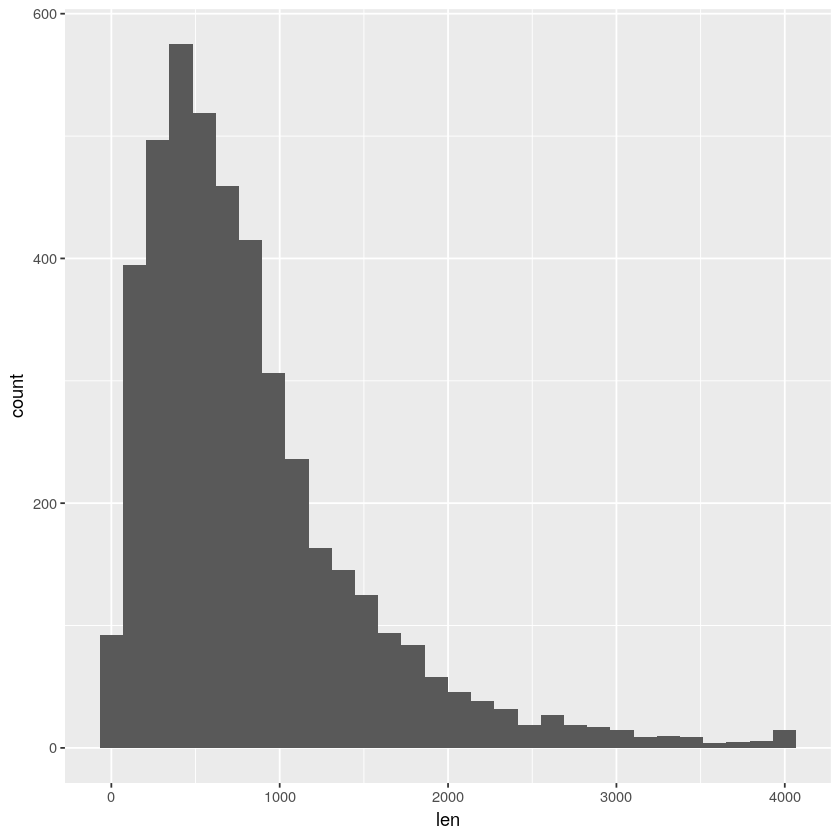

In [10]:
df %>%
    mutate(len = str_length(narrative)) %>%
    ggplot(aes(x = len)) +
        geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



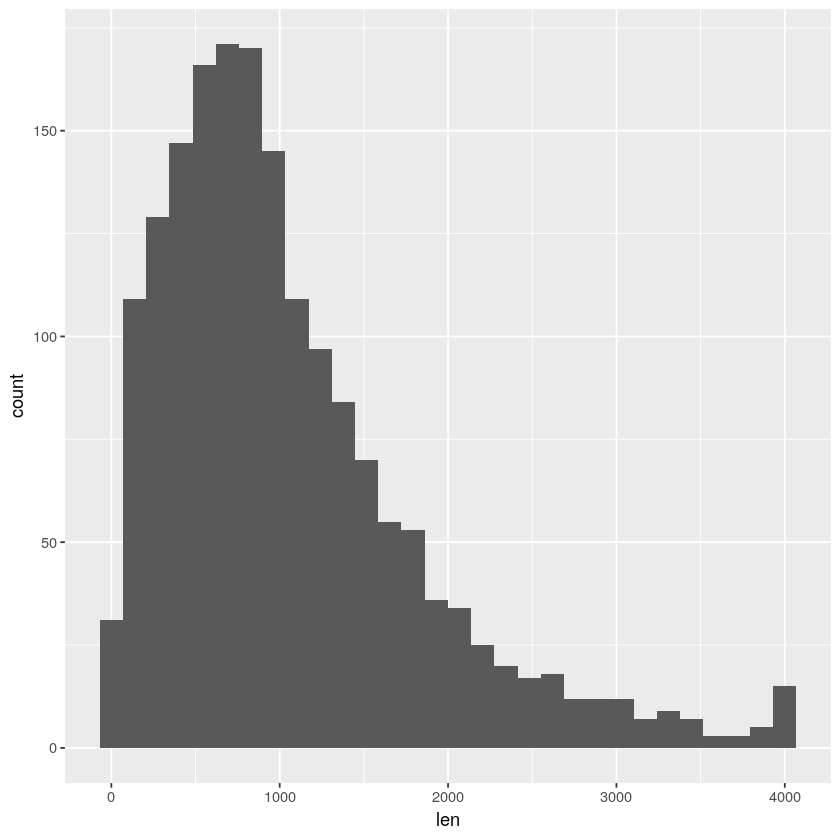

In [11]:
df %>%
    filter(significant == T) %>%
    mutate(len = str_length(narrative)) %>%
    ggplot(aes(x = len)) +
        geom_histogram()

### Do the narratives get longer over time?

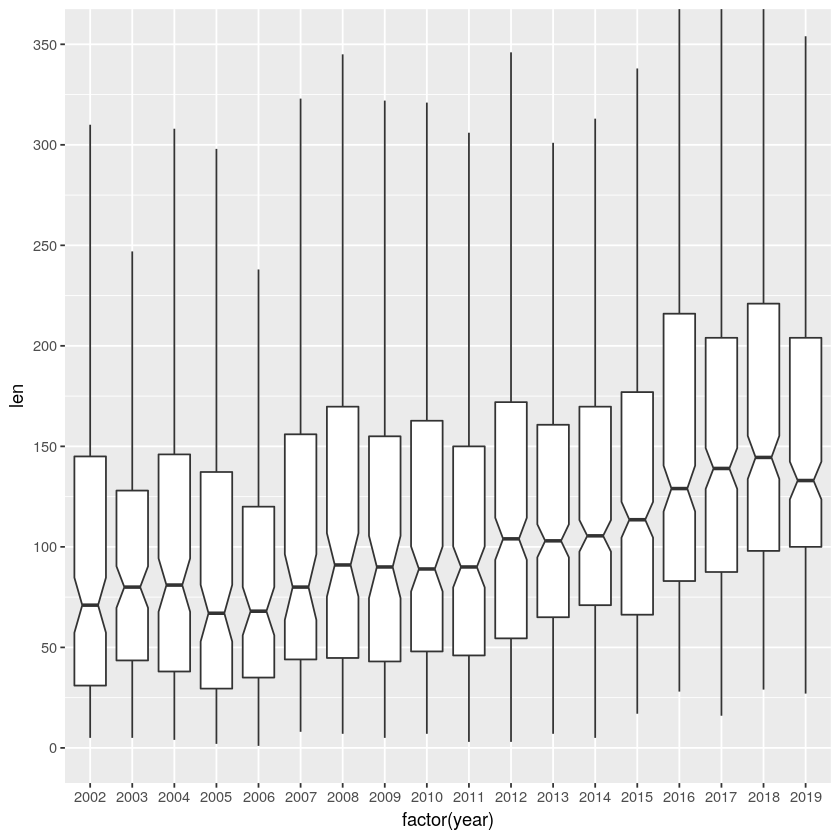

In [12]:
df %>%
    mutate(len = str_count(narrative, "\\S+")) %>%
    filter(year >= 2002, year < 2020) %>%
    ggplot(aes(x = factor(year), y = len)) + 
        geom_boxplot(notch = T, outlier.shape = NA) + 
        scale_y_continuous(limits=c(0, 350), oob=scales::rescale_none, breaks = seq(0, 350, 50))

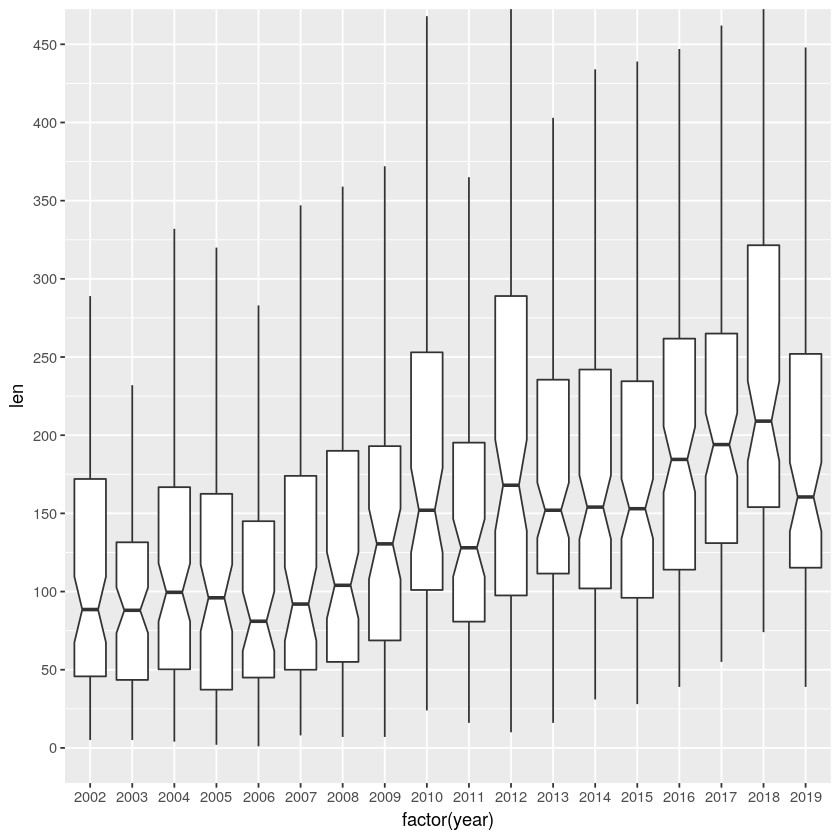

In [13]:
df %>%
    mutate(len = str_count(narrative, "\\S+")) %>%
    filter(year >= 2002, year < 2020, significant == T) %>%
    ggplot(aes(x = factor(year), y = len)) + 
        geom_boxplot(notch = T, outlier.shape = NA) + 
        scale_y_continuous(limits=c(0, 450), oob=scales::rescale_none, breaks = seq(0, 550, 50))

## Simple topic model

### Prepare

In [14]:
narratives <- select(df, incident_ID, narrative)

head(narratives, 3)

incident_ID,narrative
<dbl>,<chr>
20020020,"On january 25, 2002 we received a call that the oil/condensate transportation pipeline in west delta block 24 appeared to have a leak. The field was shut-in and the pressure on both ends of the pipeline was dropped to zero pounds. Total estimated release to the gulf of mexico from the time the pipeline began to leak until the repair was completed is 13.8 gallons. Denbury mobilized a dive team, obriens oil spill specialists, sorbent boom, pipeline repair clamp and a project manager. A jackup boat with a crane that was in the field doing other work was diverted to this project. The crews arrived in the field at approximately 1800 hours 01/25/02 and transferred to the jackup boat. The jackup boat. The jackup was repositioned to where the leak appeared to be emanating. Once the sorbent boom was in place, the divers began looking for the leak and chipping concrete from the 12 inch diameter pipeline. The divers found the leak and the pressure clamp was installed. The pipeline was repressured and held for 4 hours. Once it was determined the pressure was holding and the clamp was sealed, the repair and spill team were demobilized at approximately 1400 hours on january 27, 2002."
20020024,The line had a seep at the joint connection. The seep surfaced in the ditch. We estimate the oil released to be 2-3 barrels or less. The genesis in-house crew arrived and welded a patch on the line. Genesis cleanup crew cleaned up the spill and are monitoring the site daily. Samples from the excavation of the pipeline was completed and bnc has sent the samples to a third party lab for tph and btex sampling as required.
20020027,"Landowner was drilling post holes for fencing on his property using a hydraulic tractor auger. Pipeline marker signs were in place and visible at the site. The landowner did not make a one-call notification to empco. He hit the line with the power auger, then called empco with his cell phone at the site. Empco immediately shut down the system and dispatched pipeline repair and cleanup people to the site. Permanent repairs were completed by welding a full wrap on the line segment. Cleanup was completed by recovering free oil, removing soil for remediation, and replacing soil at the leak site."


In [15]:
word_counts <- narratives %>%
    unnest_tokens(word, narrative) %>%
    anti_join(data.frame(word = str_to_lower(names)), by = "word") %>%
    anti_join(stop_words, by = "word") %>%
    filter(! str_detect(word, "^[0-9]")) %>%
    mutate(word = wordStem(word)) %>%
    count(incident_ID, word, sort = T) %>%
    cast_dtm(document = incident_ID, term = word, 
             value = n)
word_counts

<<DocumentTermMatrix (documents: 4434, terms: 8177)>>
Non-/sparse entries: 206815/36050003
Sparsity           : 99%
Maximal term length: 142
Weighting          : term frequency (tf)

### Find number of topics

In [16]:
# results_1 <- FindTopicsNumber(word_counts, 
#                               topics = c(5, 10, 20, 40), 
#                               metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                               method = "Gibbs", 
#                               control = list(seed = 532))
# saveRDS(results_1, file = ".temp/results_1.rds")
results_1 <- readRDS(".temp/results_1.rds")

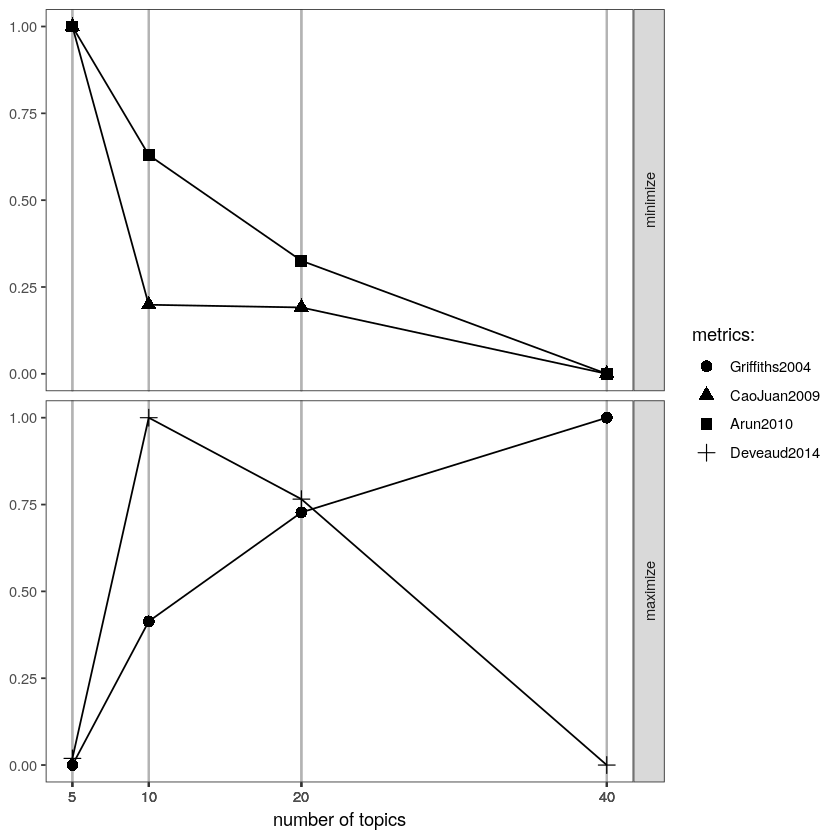

In [17]:
FindTopicsNumber_plot(results_1)

In [18]:
# results_2 <- FindTopicsNumber(word_counts, 
#                             topics = c(15, 18, 19, 20, 21, 22, 25), 
#                             metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                             method = "Gibbs", 
#                             control = list(seed = 544))
# saveRDS(results_2, file = ".temp/results_2.rds")
results_2 <- readRDS(".temp/results_2.rds")

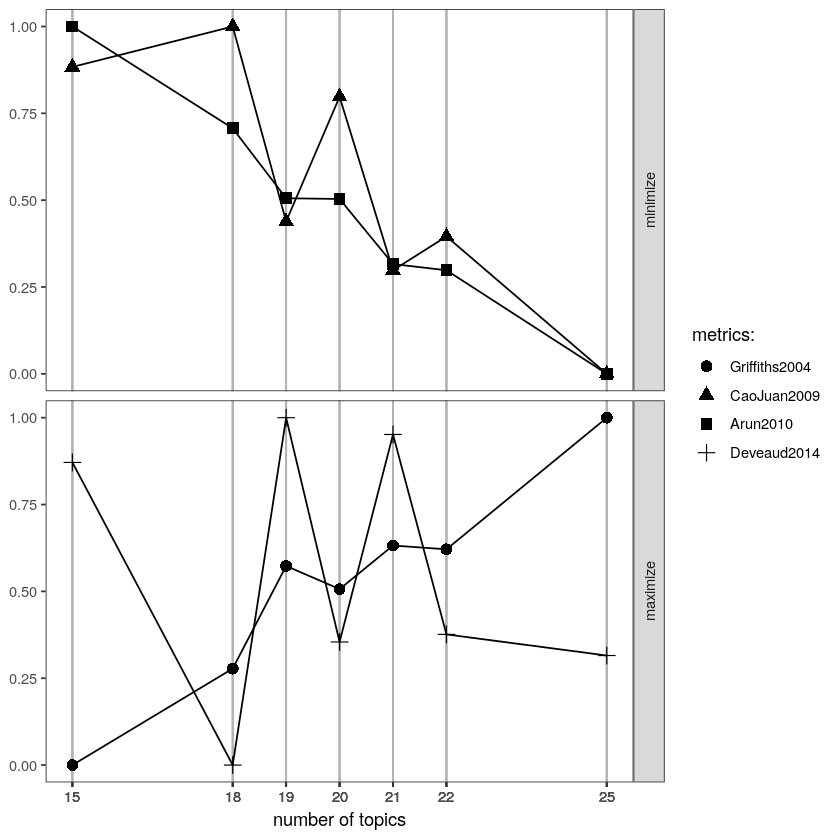

In [19]:
FindTopicsNumber_plot(results_2)

In [20]:
# results_3 <- FindTopicsNumber(word_counts, 
#                             topics = seq(15, 35), 
#                             metrics = c("Griffiths2004", "CaoJuan2009", "Arun2010", "Deveaud2014"),
#                             method = "Gibbs", 
#                             control = list(seed = 912))
# saveRDS(results_3, file = ".temp/results_3.rds")
results_3 <- readRDS(".temp/results_3.rds")

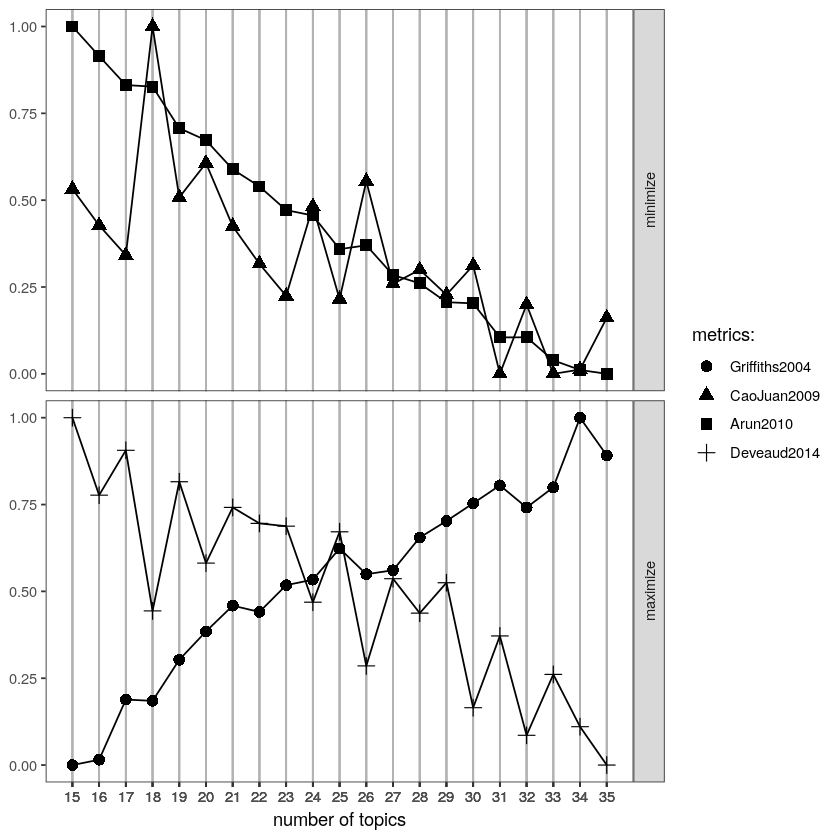

In [21]:
FindTopicsNumber_plot(results_3)

### Inspect model

In [22]:
# narratives_lda <- LDA(word_counts, method = "Gibbs", k = 25, control = list(seed = 912))
# saveRDS(narratives_lda, ".temp/narratives_lda.rds")
narratives_lda <- readRDS(".temp/narratives_lda.rds")
narratives_lda

A LDA_Gibbs topic model with 25 topics.

In [23]:
betas <- tidy(narratives_lda, matrix = "beta")
head(betas)

topic,term,beta
<int>,<chr>,<dbl>
1,line,8.054967e-06
2,line,7.561036e-06
3,line,7.818792e-06
4,line,7.682439e-06
5,line,8.091466e-06
6,line,8.868629e-06


In [24]:
top_terms <- betas %>%
    arrange(desc(beta)) %>%
    group_by(topic) %>%
    slice_head(n = 5) %>%
    ungroup() %>%
    arrange(topic, -beta)

head(top_terms, 10)

topic,term,beta
<int>,<chr>,<dbl>
1,flang,0.06372284
1,gasket,0.04181333
1,instal,0.03963849
1,procedur,0.02852264
1,employe,0.02570340
2,respons,0.05883242
2,activ,0.04151765
2,initi,0.04008105
2,releas,0.03826641


In [25]:
# datatable(top_terms, options = list(pageLength = 5))

## Look at terms and example for topics

### Setup

In [26]:
gammas <- tidy(narratives_lda, matrix = "gamma")
head(gammas)

document,topic,gamma
<chr>,<int>,<dbl>
20140071,1,0.02097902
20130283,1,0.01694915
20160294,1,0.01856764
20110421,1,0.04318937
20140177,1,0.01621622
20040214,1,0.01408451


In [27]:
narratives <- select(df, incident_ID, narrative)
narratives$incident_ID <- as.character(narratives$incident_ID)

get_narrative <- function(topic) {
    gammas %>%
        filter(topic == {{topic}}) %>%
        filter(gamma == max(gamma)) %>%
        left_join(narratives, by = c("document" = "incident_ID")) %>%
        {.$narrative}
}

get_terms <- function(topic) {
    top_terms %>%
        filter(topic == {{topic}}) %>%
        mutate(term = reorder_within(term, beta, topic)) %>%
        ggplot(aes(term, beta)) +
            geom_bar(stat = "identity") +
            scale_x_reordered()
}

This is where we will store incident cause type topics.

In [28]:
causes <- c()

### Topic 1

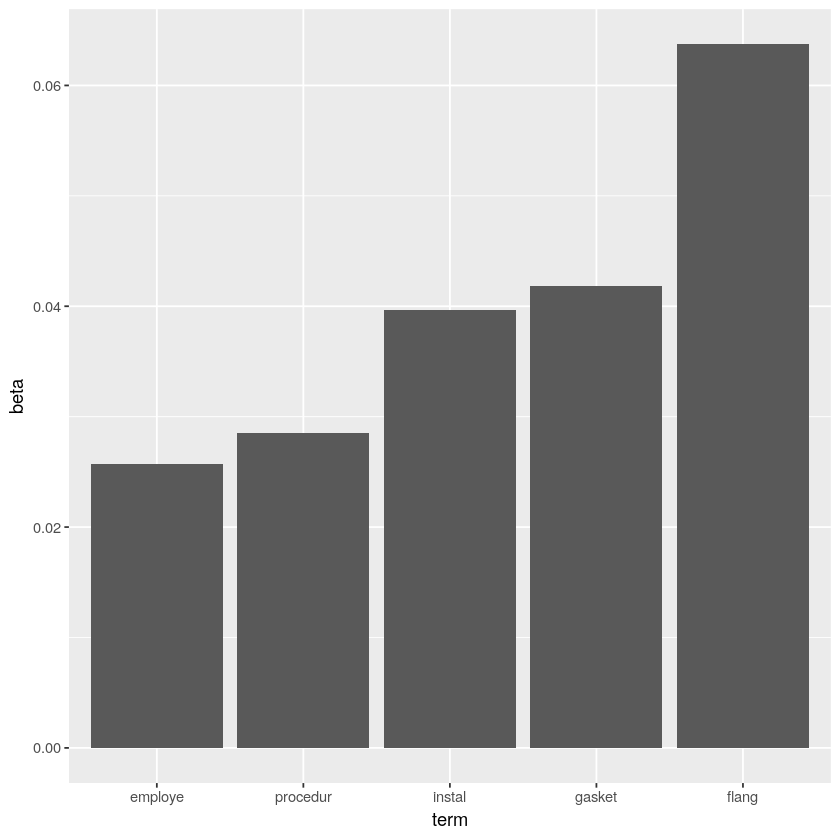

In [29]:
get_terms(topic = 1)

In [30]:
get_narrative(topic = 1)

[1] "On 5/3/2019, contractors had just completed a project to install two new valves and remove slip blinds that had been installed to isolate a new section of a header at the valve connection point. Upon completion of the installation, the contractor was going to pressure test a segment of pipe that had been slacked in preparation for making the connections.     Even though, the newly installed valve connecting to the new section of the header appeared to be closed (flag on valve signaled closed), it was later found it had not seated properly.  When the contractor applied nitrogen to the line in an attempt to do the pressure test, residual product in the slacked line was pushed through the unseated valve and onto the header where a slip blind had been removed.  Unfortunately, the flange was still in the process of being reconnected so the bolts remained untightened, thereby allowing product to leak into secondary containment below. The inspector did not anticipate the valve leaking through, therefore, was not unduly concerned that the flange had not been reconnected to ensure a closed system.    Plan to prevent reoccurrence: inspector has been suspended and will be retrained prior to returning to work. Process has been updated to include a requirement to fully close a system prior to pressure testing any installation on a regulated pipeline."

This is a good candidate for a narrative that describes incident causes.

In [31]:
causes <- c(causes, 1)
print(causes)

[1] 1


### Topic 2

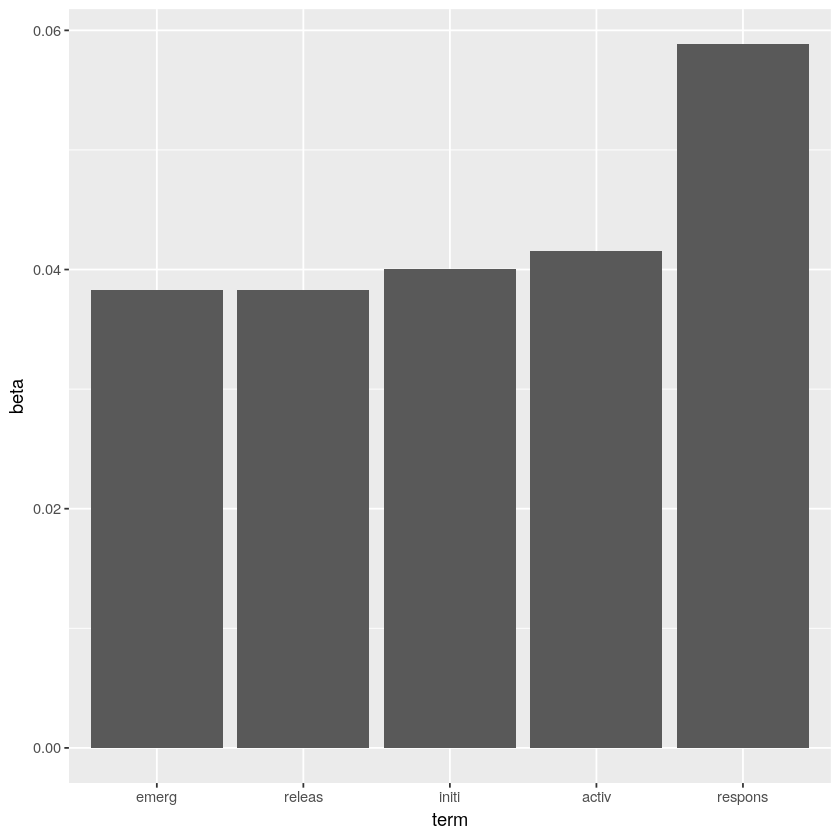

In [32]:
get_terms(2)

In [33]:
get_narrative(2)

[1] "On april 24, 2002, buckeye pipe line company was performing an investigation of a suspected anomaly identified during a smart pig run on the 701 pipeline near maine, new york.  A buckeye pipe line company maintenance crew hit what was determined to be an unauthorized tap extension on the pipeline while excavating the site.  The 701 pipeline was shutdown immediately and buckeye pipe line company's emergency response plan was initiated.  The tioga county sheriff department and the new york state department of environmental conservation were notified of the unauthorized tap extension.  The new york state department of environmental conservation has initiated a criminal investigation into the unauthorized tap extension.  The unauthorized tap extension was removed and the pipeline was repaired and restarted on april 25, 2002.  Clean-up activities are being conducted under the supervision of the new york state department of environmental conservation."

This topic is more likely describing the emergency response.

### Topic 3

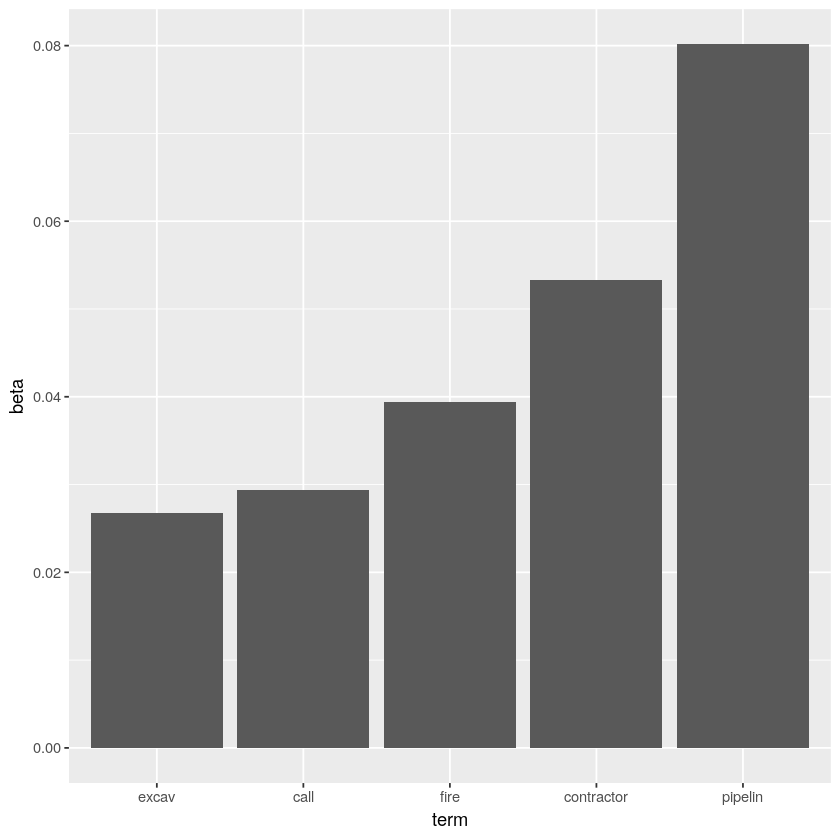

In [34]:
get_terms(3)

In [35]:
get_narrative(3)

[1] "¿Tech con trenching struck the pipeline while trenching on june 12, 2013.  Tech con had failed to (1) send proper one-call notification; (2) accurately identify or white line the area of excavation; or (3) notify holly energy prior to excavating and/or exposing (pot-holing) the pipeline so that holly energy could re-mark the pipeline and witness this excavation process as requested in accordance with texas utility code subchapter d sec. 251.151(c).      Tech con trenching never notified holly energy of its intent to excavate across holly energy's pipeline. Holly energy received a one-call notice from jd king on the evening of june 6. Holly energy does not fully understand the connection between tech con trenching and jd king, but both entities appeared to have been working on the same project for which tech con trenching was conducting trenching on june 13.  On the morning of june 7, john osborne of holly energy called ricky knelsen of jd king at the number identified on the one-call notification ticket but received no response. On the morning of june 10 (june 8 and 9 were weekend days), osborne reached knelsen by telephone to request a description of where jd king planned to excavate. The one-call ticket did not provide a clear identification of the area, and neither jd king (nor tech con trenching) had marked the proposed excavation area with white lines.     After osborne explained the location of holly energy's pipeline, knelsen told osborne that jd king would not start excavating in the vicinity of the pipeline until the week of june 17. Osborne and knelsen agreed that the two would meet at the site at this time so that knelsen could identify where the excavation would cross the pipeline and osborne would mark the pipeline in advance of trenching activities. Knelsen said that he would call osborne when the excavation was closer to the pipeline to arrange the meeting specifics. Osborne also told knelsen that holly energy wished to be present during excavation so that osborne could visually observe pot-holes cored adjacent to the pipeline and to ensure that excavation below holly energy's pipeline was performed safely.     As indicated above, knelsen told osborne that jd king would not arrive to the pipeline area until the week of june 17. But, the excavators moved into the area much sooner than osborne had been told, and neither knelsen nor anyone else with jd king called osborne to inform him of this fact. On june 12, excavation equipment hit holly energy's pipeline, causing significant damage and the release of product to the environment.     It is noteworthy that, as a result of a prior one-call notification, holly energy's pipeline was already marked in the area where the trenching equipment hit the pipeline with yellow pin flags. Holly energy's yellow pin flags. Holly energy's yellow pin flags were still present and visible when holly energy representatives arrived to the site after its line was struck."

This topic seems to capture contractor mistakes.

In [36]:
causes <- c(causes, 3)
causes

[1] 1 3

### Topic 4

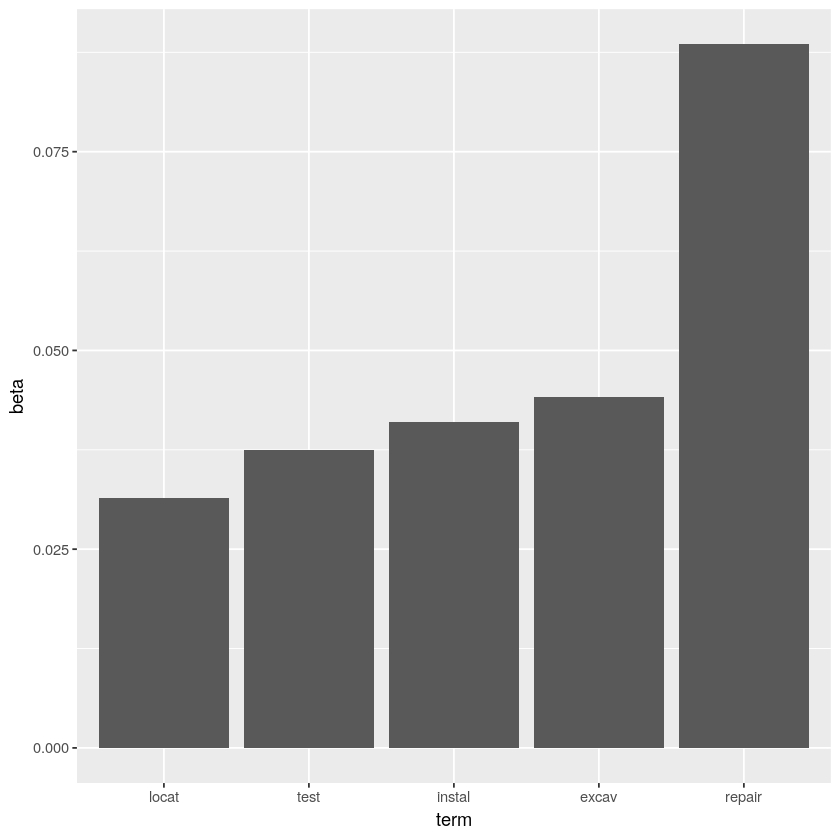

In [37]:
get_terms(4)

In [38]:
get_narrative(4)

[1] "February 16, 2016-fuel oil pipeline (fopl)id#39191 was in normal operation, transferring 109 gpm #6 fuel oil (product) from 74th street station (manhattan) to ravenswood station (queens) at 23.3 psig at ravenswood station and 25.5 psig at 74th street at the time of product release discovery. Discovery of product was from an electrical facility underground vault structure id mh-16261, located 28 feet east of pipeline. Pipeline was immediately shutdown and notifications made. Site area cleanup commenced immediately with the onsite ravenswood environmental response contractor. Pipeline was excavated following utility mark out . Leak location was discovered on february 27, 2016. Leak was characterized as 2- 1/8\" diameter pinholes in the extrados of a buried 90 degree pipeline elbow. The foam glass insulation and corrosion prevention external coating were observed as displaced and disbonded.   April 19- new elbow section was bench pressure tested and passed the 4 hour offline witnessed by nys-dps arpit mehta test at 160 psig. Fopl id#39191 maop pressure is 80 psig. Psc file #l16.01 was issued for this test. The contractor removed the leaking elbow section and the new pressure tested elbow section was installed by the vendor. Radiographic examination of pipeline elbow tie in welds complete, and successful.  May 2-1103 hrs-fopl id#39191 was placed in service for 24 hour surveillance at an established 50 gpm flowrate.  Fdny representative was on site to witness the beginning of in-service testing.   May 3-1106 hrs-fopl id#39191 completed the 24 hour in-service fdny test and the fuel oil pipeline remained in service to 74th street station. No visual observed or cpm leaks have been detected.     May 5 & 15- two separate pressure decay tests were performed. The 2nd test was enhanced by running it for 60 minutes, instead of the normal 20 minutes, to further understand the pressure decay behavior and if the decay plateaued. This test passed the pressure decay test criteria.   May 19-site environmental contractor begins further excavation clean up to perform an inspection of the exposed main gas and fuel oil lines. In the course of this work, an increase in the ingress of oil into the excavations is observed.  May 16-17-after analyzing pressure 5/15 decay testing, further testing was conducted of fopl id #39191  by increasing the pumping pressure and observing mass flow meter differentials on the leak detection system. Data was inconclusive to confirm or deny presence of an active leak.  A decision was made to remove the line from service, and lay it up with low pour oil.   May 18-four separate one hour line pressure decay tests were performed. The first with the full line. The last 3 with the line segregated as described above. With the line segregated the 791 ft. Ravenswood section decayed 46 psi, and con edison section decayed 5.7 psi over the hour. This test was essentially repeated 2 more times. The fuel oil pipeline remains out of service and an investigation plan is being set.   June 17-transcanada is still investigating the fuel oil pipeline second leak location on their site by excavating the surface and exposing the pipeline west of the original leak location. The fuel oil pipeline remains shutdown during this leak identification process.   July 15-the oil recovery estimate has increased to 244 barrels of oil from 231 barrels on the transcanada property.  July 24-a witnessed hydrostatic testing of fopl id #39191 was successfully completed at 150% (125psig) of maop for 12 hour period. Con edison engineering department reviewed and accepted the testing results on august 15.   August 10-the oil recovery estimate increased to 249 barrels of oil.  Transcanada will continue to monitor remediation control in this area and will update state/federal agencies on oil recovery developments. Nysdec#1510992 case.  September 12-transcanada excavation areas are being backfilled.  November 3- fopl id#39191 was returned to service as of 1600 

This topic also seems to describe a response type.

### Topic 5

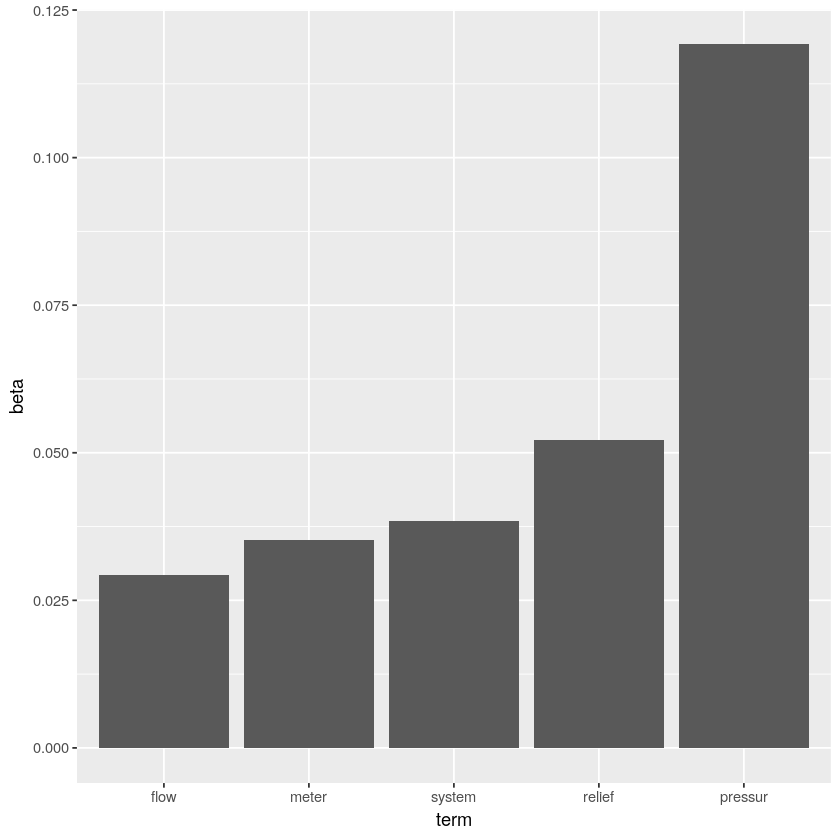

In [39]:
get_terms(5)

In [40]:
get_narrative(5)

[1] "On 3/2/19 at approximately 16:45 the control center had initiated proving of the inbound delaware basin meter at the permian express terminal.  The proving was aborted by the controller.  After the abort command was sent the section of piping between the meter and receipt trap experienced an overpressure noted in scada.  Controller immediately shutdown the inbound flow and operations personnel were contacted and dispatched to investigate.  At approximately 17:00 local operations personnel identified a small release at the strainer between the receipt trap and meter.  The overpressure caused the o-ring on the strainer to fail and leak.  The strainer o-ring was replaced, all other associated piping visually inspected and a static pressure test completed on the affected piping and appurtenances to ensure no other damage had been incurred.      Review of the incident identified that after the proving was aborted the automatic valve sequencing did not properly occur allowing prover valves to close prior to the bypass valve opening resulting in the overpressure.  The prover and affected meter remained locked out while programming logic review and additional investigation took place.  The inbound flow was restarted through an alternate receipt meter at 20:45 under manned observation.    Further investigation determined that the bypass valve had loose wiring which caused the valve to stall in closed position when meter proving was aborted on 3/2/19.  It is believed that the loose wiring was caused by vibration over time. The travel limit switches on the bypass valve were found to be improperly set causing the valve to not travel to full open position which caused vibration during certain levels of flow.  The loose wiring was repaired, the valve travel limit switches were adjusted and the programming logic for prover operation valve sequencing was reviewed and tested with all found to be correct.  Meter set was returned to normal operation."

Again, this seems to describe a failure type.

In [41]:
causes <- c(causes, 5)

## See development of causes over time

In [42]:
df$incident_ID <- as.character(df$incident_ID)

topic_by_year <- gammas %>%
    left_join(select(df, incident_ID, year), by = c("document" = "incident_ID")) %>%
    group_by(year, topic) %>%
    summarize(gamma = sum(gamma) / n()) %>%
    ungroup()
head(topic_by_year)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,topic,gamma
<dbl>,<int>,<dbl>
2002,1,0.03797641
2002,2,0.04399271
2002,3,0.05164081
2002,4,0.03841729
2002,5,0.04242845
2002,6,0.03934970


In [43]:
topic_development <- topic_by_year %>%
    filter(topic %in% causes) %>%
    ggplot(aes(x=year, y=gamma)) +
        geom_line() +
        geom_point() +
#         geom_smooth(method = "lm") +
        facet_wrap(~ topic) + 
        scale_x_continuous(minor_breaks = seq(2002, 2019, 1)) + 
        theme(panel.grid.major.x = element_line(color = "grey35", size = 0.6), 
              panel.grid.minor.x = element_line(color = "grey35", size = 0.2))

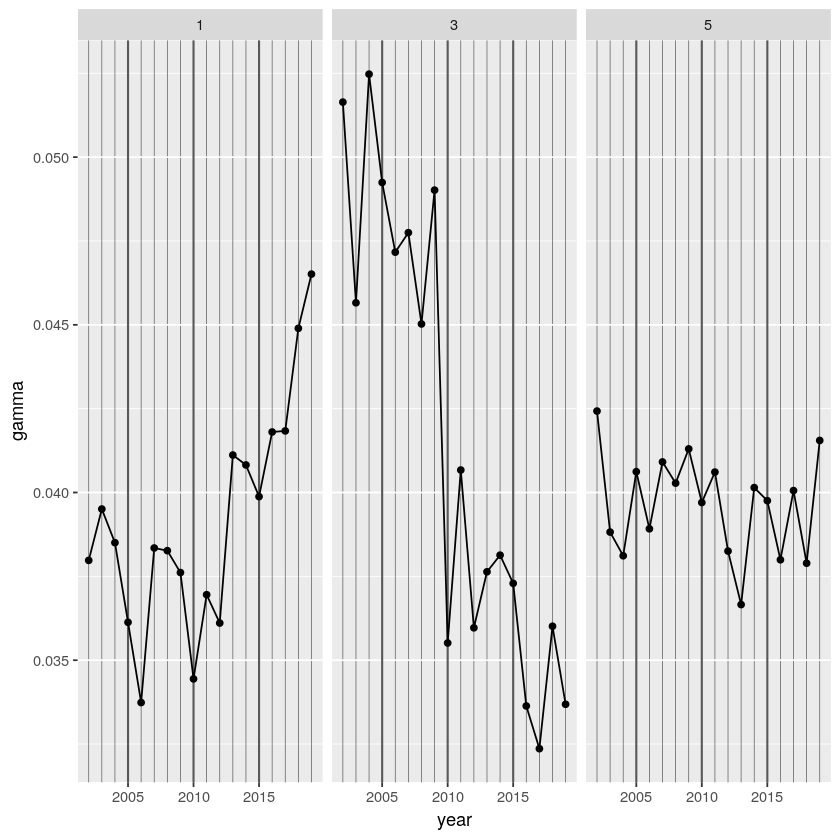

In [44]:
topic_development

## Other

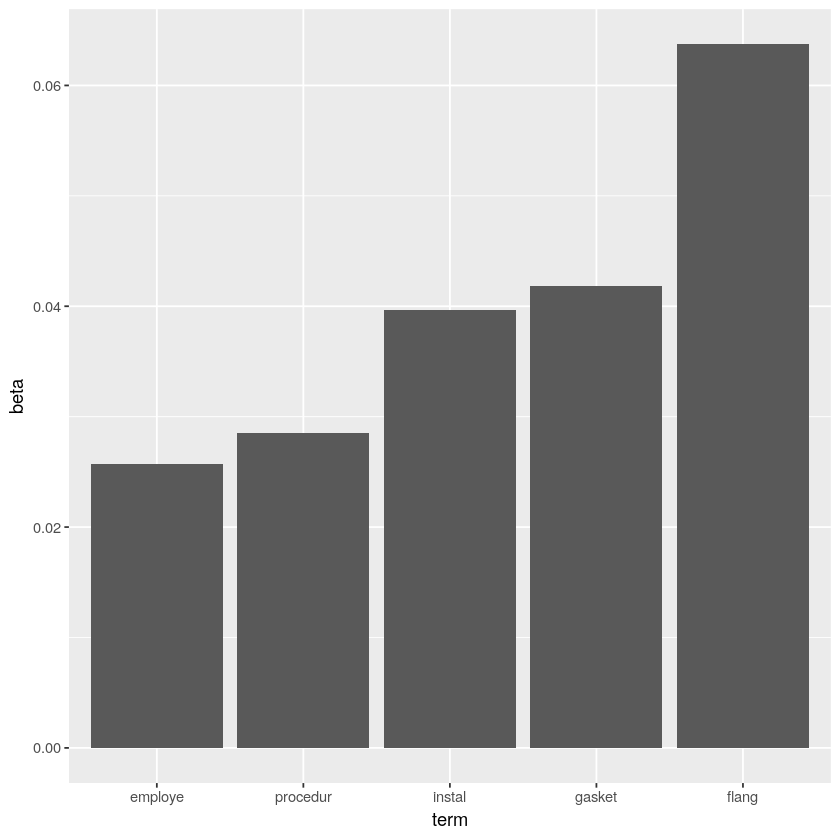

In [45]:
top_terms %>%
    filter(topic == 1) %>%
    mutate(term = reorder_within(term, beta, topic)) %>%
    ggplot(aes(term, beta)) +
        geom_bar(stat = "identity") +
        scale_x_reordered()

#### Check some narratives

In [46]:
set.seed(500)
some_narratives <- sample(gammas$document, 9)
some_narratives

[1] "20150059" "20150459" "20060025" "20130113" "20150289" "20110146" "20150406"
[8] "20160013" "20160309"

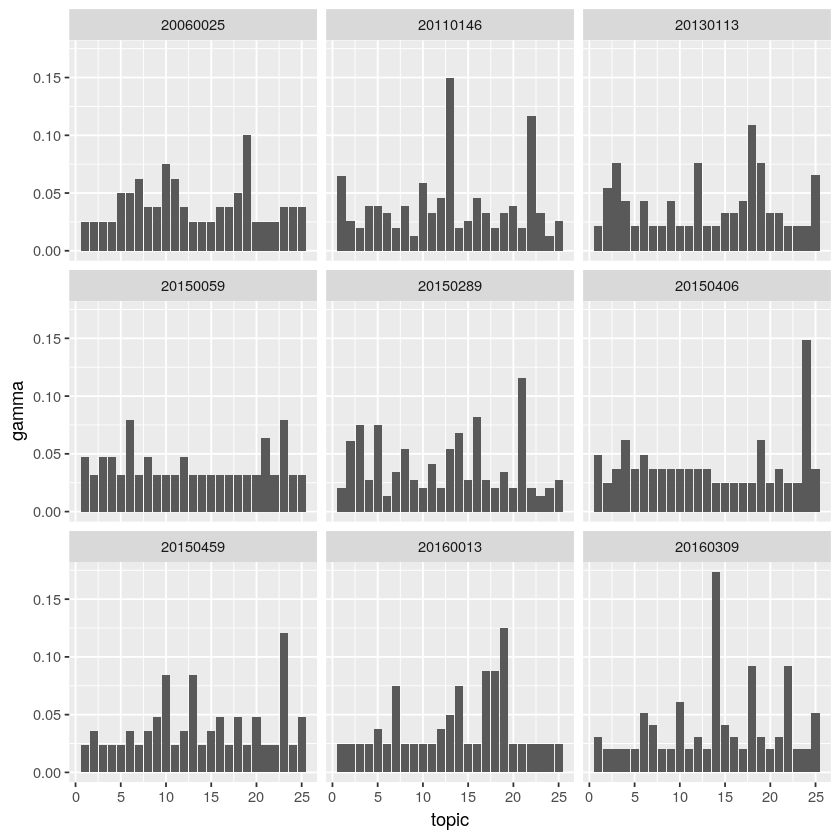

In [47]:
gammas %>%
    filter(document %in% some_narratives) %>%
    ggplot(aes(x=topic, y=gamma)) +
        facet_wrap(~ document) +
        geom_bar(stat="identity")

In [48]:
df$incident_ID <- as.character(df$incident_ID)

topic_by_year <- gammas %>%
    left_join(select(df, incident_ID, year), by = c("document" = "incident_ID")) %>%
    group_by(year, topic) %>%
    summarize(gamma = sum(gamma) / n()) %>%
    ungroup()
head(topic_by_year)

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,topic,gamma
<dbl>,<int>,<dbl>
2002,1,0.03797641
2002,2,0.04399271
2002,3,0.05164081
2002,4,0.03841729
2002,5,0.04242845
2002,6,0.03934970


`geom_smooth()` using formula 'y ~ x'



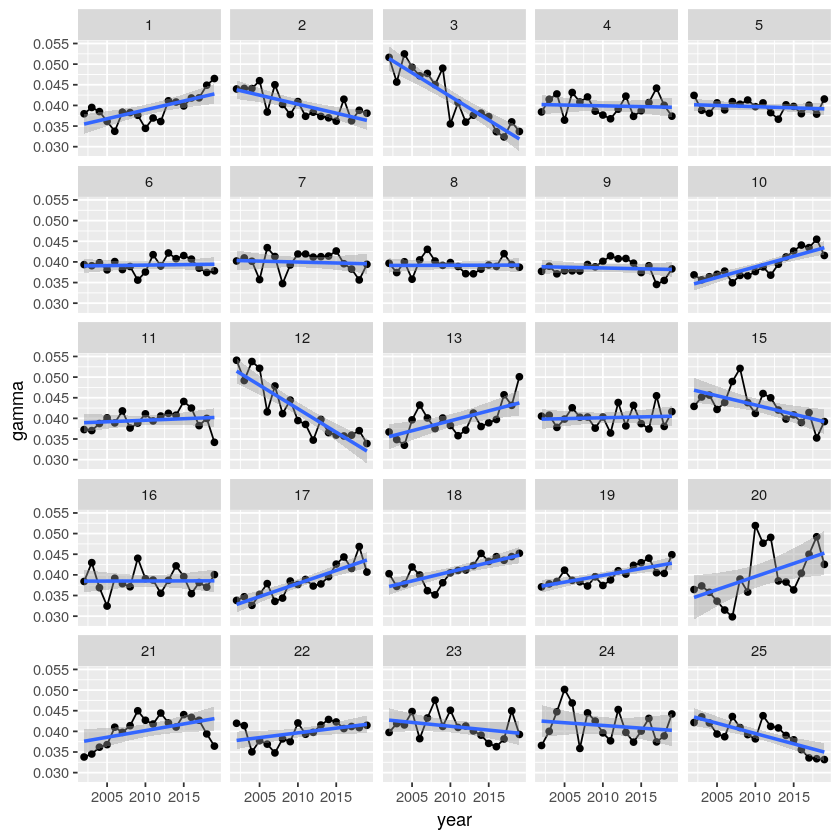

In [49]:
topic_by_year %>%
    ggplot(aes(x=year, y=gamma)) +
        geom_line() +
        geom_point() +
        geom_smooth(method = "lm") +
        facet_wrap(~ topic)